# EDA - Titanic 

#### Adapted from: 
- Ozdemir, Sinan. Principles of Data Science

##### Sources:
- https://www.kaggle.com/c/titanic/data
- https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
- https://www.datacamp.com/community/tutorials/k-means-clustering-python
- https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_15/master/data/titanic.csv')

### Data Prepration

In [3]:
titanic.shape #rows, columns

(891, 12)

In [4]:
titanic.head() #Top 5 elements

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info() #Info about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We have:
- 11 Features and 1 Response (Survived)
- 891 Observations 

* Quantitative/numerical: discrete/continuous & timeseries & interval/ratio

* Qualitative/categorical: nominal/ordinal 

##### All features: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked

- Which features are categorical? PassengerId, Survived, Pclass, Name, Sex, Ticket, and Embarked.

Ordinal: Pclass

- Which features are numerical? Age, SibSp, Parch, Fare.

Continous: Age, Fare. Discrete: SibSp, Parch.


#### What else can you see?
  
<details>
Cabin has the least number of non-null vlaues
    
Age & Embarked has some missing values  
</details>
    

### Visulaizing missing values:

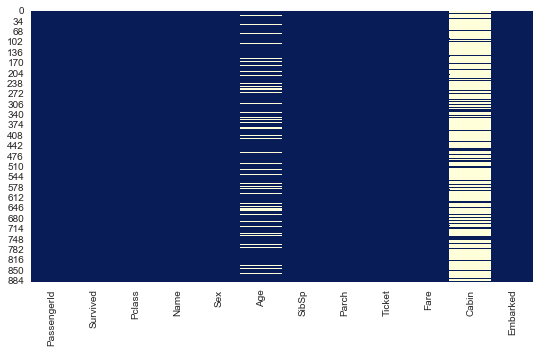

In [6]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(titanic.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

The heatmap above shows how much data are missing!

In [7]:
# creating a new Series 'total' that sums the number of empyt cells 'NA' in each column 
# The result is then sorted from highest to lowest 
total = titanic.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [8]:
# Another way to get the total number of empty values in a column
sum(titanic['Age'].isnull())

177

In [9]:
# Now, we calculate the percentage and sort the values in 'percent'
percent = (titanic.isnull().sum()/titanic.isnull().count()*100).sort_values(ascending=False)
percent

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [10]:
#Now, we concat the two Serieses (total, percent) in a new DataFrame and we print the top 3 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data.head(3)

,Total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [11]:
# Another way
missing_data = pd.DataFrame({'percent_missing': titanic.isnull().sum() * 100 / len(titanic)})
X = missing_data.sort_values(by="percent_missing",ascending=False)
X.head(3) #Note X is a series not a DataFrame because .sort_values() returns a series 

,percent_missing
Cabin,77.104377
Age,19.865320
Embarked,0.224467


### Decisions:

<details>
    <ul>
        <li>Drop cabin, too much to fill!</li>
        <li>Age?!</li>
        <li>Embarked easier!</li>
    </ul>
</details>

In [12]:
titanic.drop(['Cabin'], axis=1,inplace=True) #We need to provide  axis=1 to drop a column

## Now for age and Embarked

We can fill age with the mean! 

In [13]:
average_age = titanic['Age'].mean()
titanic['Age'].fillna(average_age, inplace = True)

#Fill with median instead!
# titanic['Age'].fillna(titanic['Age'].median(), inplace = True) 

In [14]:
print (sum(titanic['Age'].isnull())) #See that it is zero now 

0


For embarked we can either fill it with 'NA' or with the most common value 

In [15]:
print(titanic.Embarked.value_counts()) 

S    644
C    168
Q     77
Name: Embarked, dtype: int64


We can see that 'S' is the most common value!

In [16]:
# fill NA with 'S' 
titanic.loc[titanic.Embarked.isna(),'Embarked'] = "S" 

In [17]:
#Another way: fill with Mode
#titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

In [18]:
# Another option fill it with 'NA'
#titanic.Embarked.fillna(value='NA',inplace=True)

In [19]:
print (sum(titanic['Embarked'].isnull())) #See that it is zero now 

0


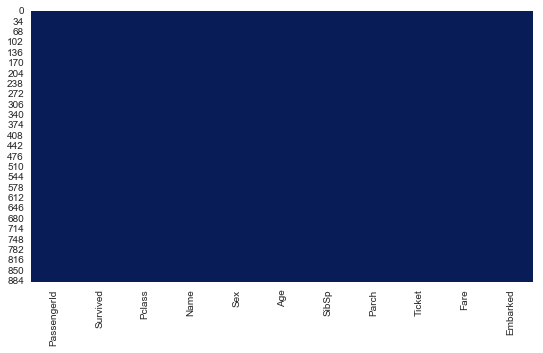

In [20]:
#Use heatmap again to show that they have been all filled
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(titanic.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

## EDA:
#### Univariate, non-graphical

In [21]:
# categorical columns:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Graham, Mr. George Edward",male,CA. 2343,S
freq,1,577,7,646


##### Name, Ticket are not cruicial to the analysis, why?

In [22]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
pd.value_counts(titanic['Ticket'].values, sort=False)

367226                2
S.W./PP 752           1
SOTON/OQ 392090       1
C.A. 29566            1
2653                  2
110413                3
C.A. 33595            1
349217                1
SOTON/O.Q. 3101311    1
19950                 4
C.A. 31921            3
19952                 1
384461                1
4579                  1
PC 17585              1
PC 17582              3
C.A. 33111            1
C.A. 33112            2
693                   1
W./C. 6607            2
220845                2
SCO/W 1585            1
226875                1
13568                 1
695                   1
394140                1
28424                 1
364499                1
W./C. 6609            1
26707                 1
                     ..
373450                1
2647                  1
PC 17612              1
368323                1
336439                1
347081                1
347060                1
350046                1
350047                1
349246                1
350042          

In [25]:
titanic.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [26]:
c = titanic.Sex.value_counts()
p = titanic.Sex.value_counts(normalize=True)
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
male,577,0.647587
female,314,0.352413


In [27]:
c = titanic.Sex.value_counts()
p = titanic.Sex.value_counts(normalize=True) * 100
pd.concat([c,p], axis=1, keys=['counts', '%'])

,counts,%
male,577,64.758698
female,314,35.241302


In [28]:
#Another way to find proportions:
Males = titanic[(titanic.Sex=='male')]
Females = titanic[(titanic.Sex=='female')]
MS = Males[(Males.Embarked=='S')]

print('The percentage of Males from Southampton equals {}%'.format(len(MS)/float(len(Males))*100))

The percentage of Males from Southampton equals 76.4298093588%


In [29]:
# numerical columns:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Notes: 
38% of passengers survived the Titanic

Age range from 0.4 to 80

The largest familes consists of 9 and 7 members!

On average, it cost 32.20 (currency) to embark the Titanic!

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 38%,52% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers paying as high as $512.
- Fewer elderly passengers within age older than 35 years.
- PassengerId is not cruicial to the analysis! why?

#### Multivariate, non-graphical

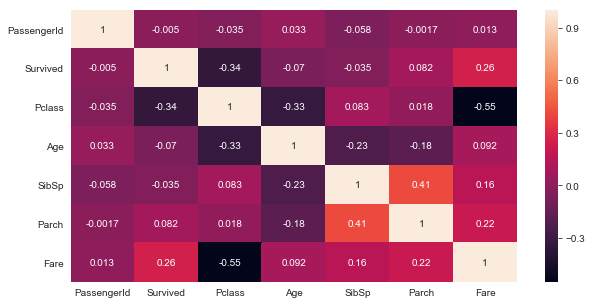

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic.corr(), annot=True)

#### Univariate, graphical

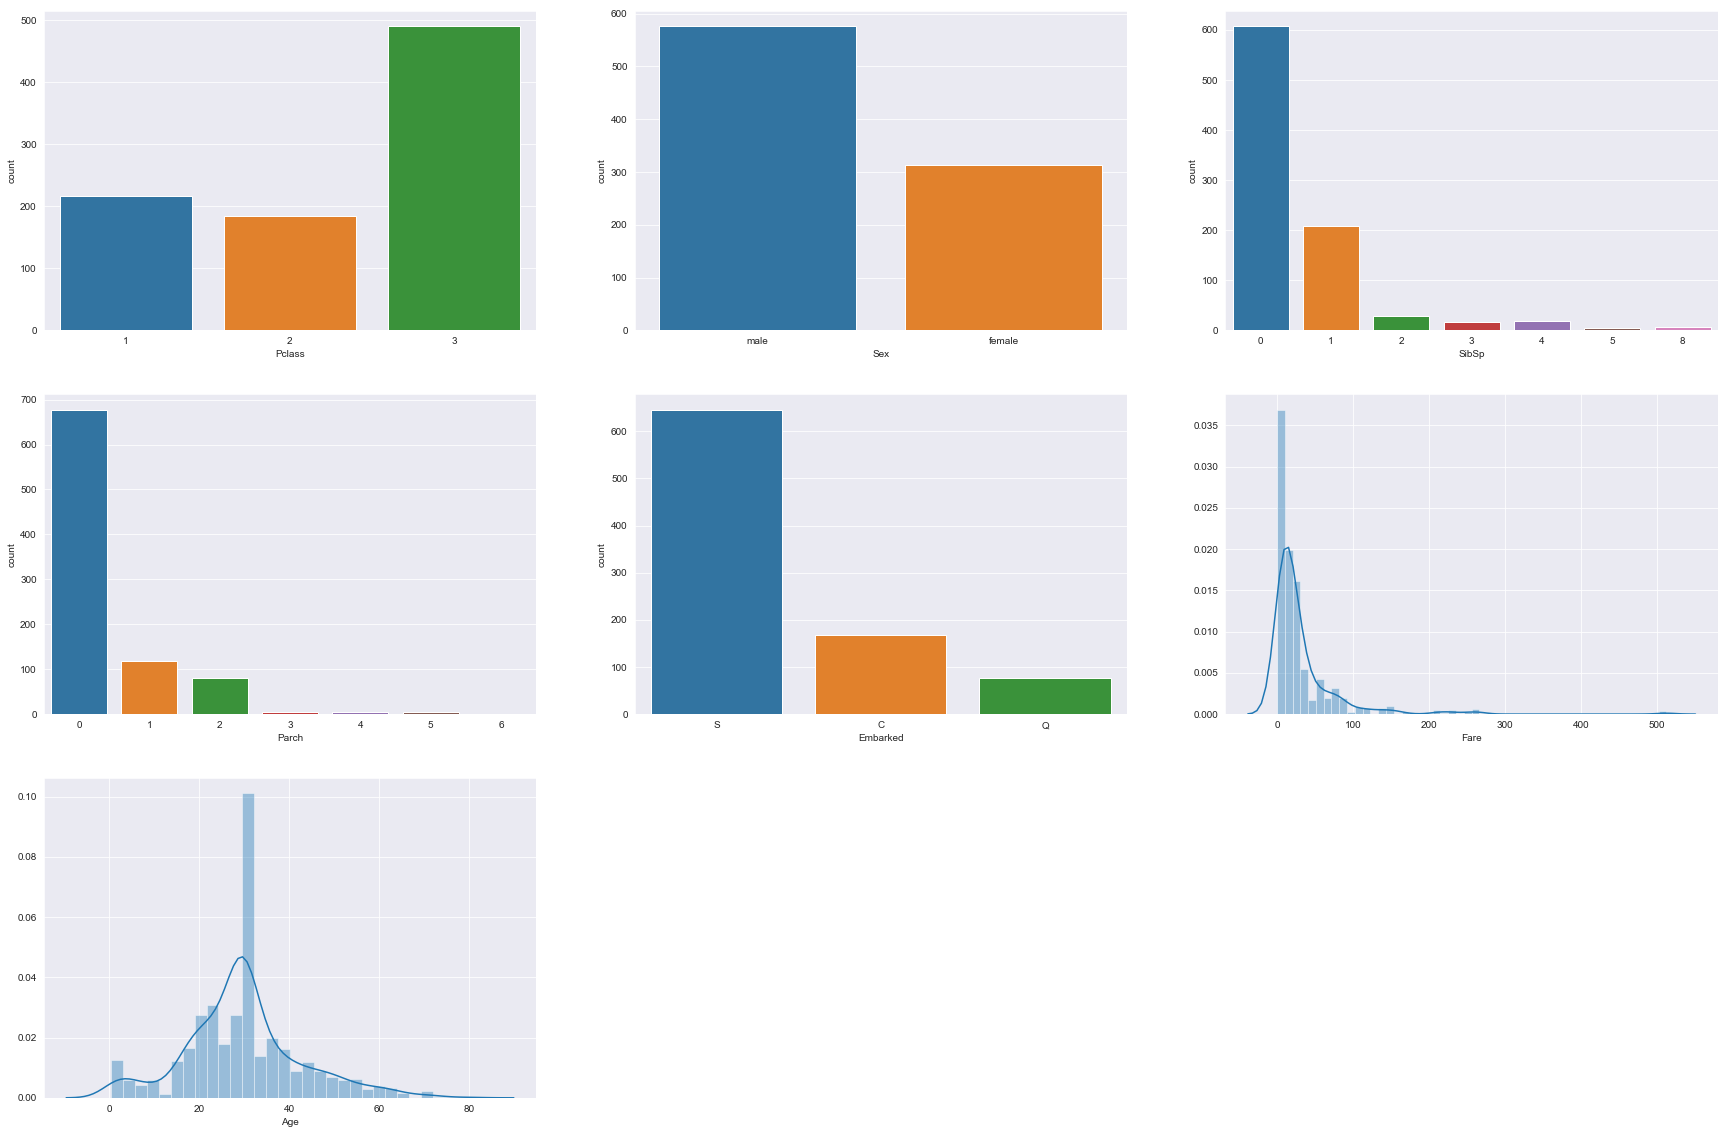

In [46]:
categ_features =  [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
conti_features = ['Fare', 'Age']

#Distribution
fig = plt.figure(figsize=(30, 20))

for i in range (0,len(categ_features)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ_features[i], data=titanic)

for col in conti_features:
    fig.add_subplot(3,3,i + 2)
    sns.distplot(titanic[col].dropna())
    i += 1
    
plt.show();

#### Bivariate, graphical
Plotting everything against Survived 

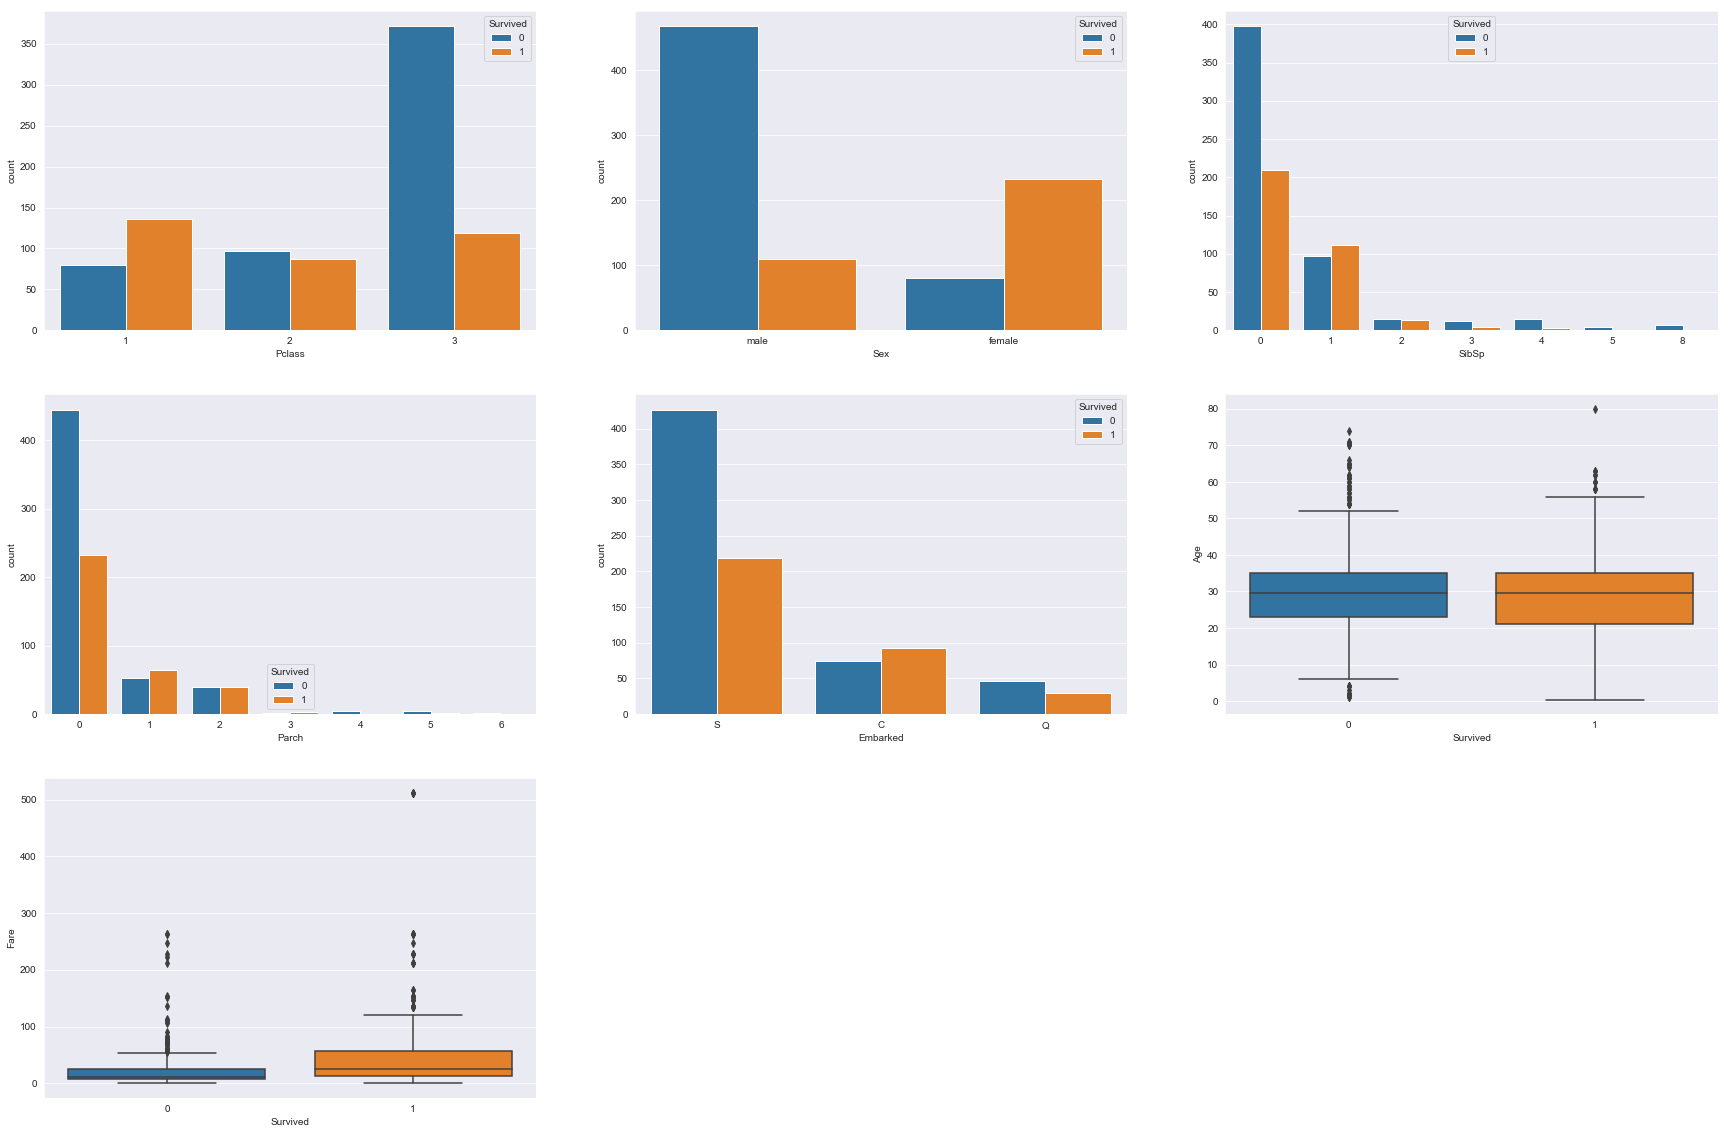

In [32]:
fig = plt.figure(figsize=(30, 20))
i = 1
for col in categ_features:
    if col != 'Survived':
        fig.add_subplot(3,3,i)
        sns.countplot(x=col, data=titanic,hue='Survived');
        i += 1

# Box plot survived x age
fig.add_subplot(3,3,6)
sns.boxplot(x="Survived", y="Age", data=titanic)

# fare and Survived
fig.add_subplot(3,3,7)
sns.boxplot(x="Survived", y="Fare", data=titanic)


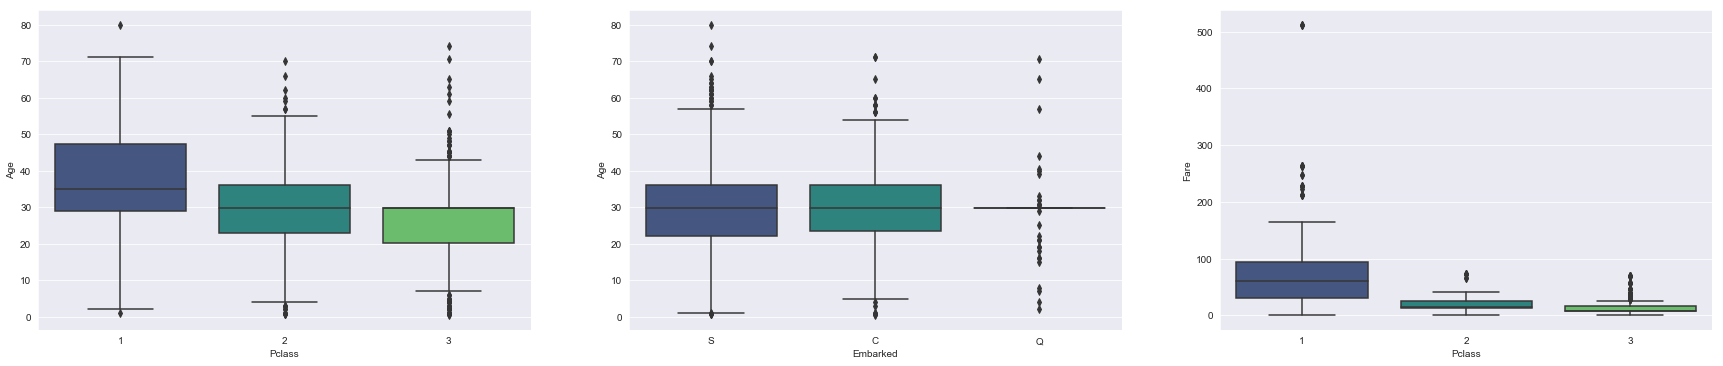

In [33]:
fig = plt.figure(figsize=(30, 20))
fig.add_subplot(3,3,1)
sns.boxplot(x='Pclass',y='Age',data=titanic, palette='viridis')
fig.add_subplot(3,3,2)
sns.boxplot(x='Embarked',y='Age',data=titanic, palette='viridis')
fig.add_subplot(3,3,3)
sns.boxplot(x='Pclass',y='Fare',data=titanic, palette='viridis')

#### Multivariate, graphical

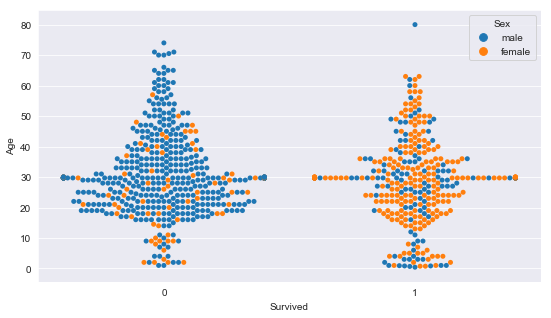

In [34]:
# Swarmplot: Age, Sex & Survived
fig, ax = plt.subplots(figsize=(9,5))
sns.swarmplot(x="Survived", y="Age", hue="Sex", data=titanic);

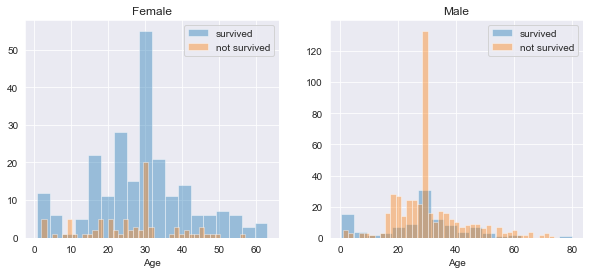

In [35]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['Sex']=='female']
men = titanic[titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

The above two plot the same features but use different types of plots 

#### However, what can you see?

Now, lets look into Embarked, Sex, Age and Survived!

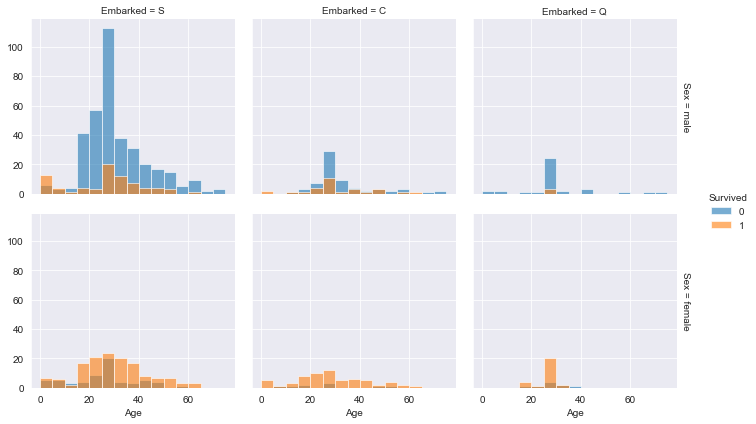

In [36]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(titanic, row='Sex', col='Embarked', hue='Survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()
plt.show();

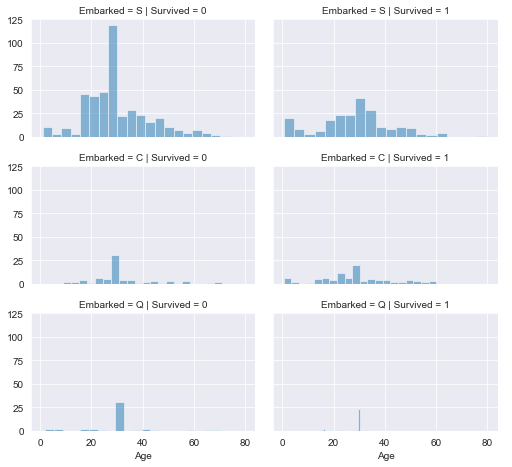

In [47]:
grid = sns.FacetGrid(titanic, col='Survived', row='Embarked', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Now for Pclass

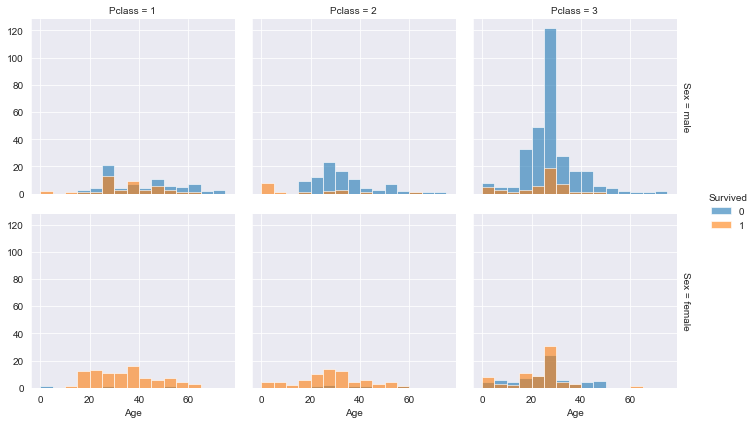

In [38]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(titanic, row='Sex', col='Pclass', hue='Survived', margin_titles=True, height=3, aspect=1.1)

g.map(sns.distplot, 'Age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))

g.add_legend()

plt.show();

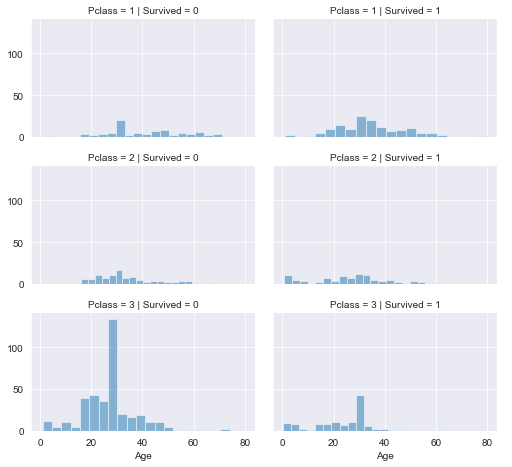

In [39]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

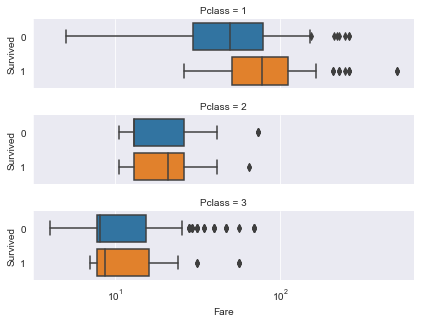

In [40]:
g = sns.catplot(x="Fare", y="Survived", row="Pclass",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("Fare > 0"))
g.set(xscale="log");

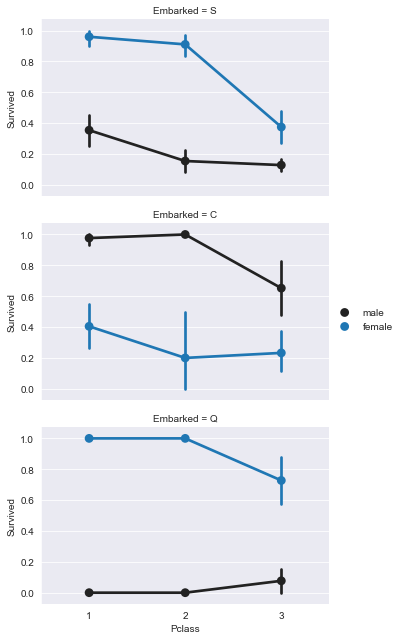

In [41]:
FacetGrid = sns.FacetGrid(titanic, row='Embarked', size=3, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend();

#### Okay so now what do we know?

- Ages matter
- Sex matters
- Embarked matters
- And Pclass also matters

Extra Statistics: 

In [42]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### what is the average age for a female or a male? what about Pclass and Survived?

In [43]:
titanic.groupby('Sex')['Age'].mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [44]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [45]:
titanic.groupby('Survived')['Age'].mean()

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64